(Defining-the-Root-Finding-Prblem-with-Multiple-Variables)=
# 5.1 Defining the Root Finding  Prblem with Multiple Variables 
What do we want to solve for if we say that we want to find the root of a function with multiple variables? In the lecture we learned that if we solve an equation with two unkown variables like: 

$$
  f_1(x,y) = c_1,
$$

we get a 1-D curve in a 2-D space. We can also call this equation a constraint. One example of this are contour plots. We can plot a function with two variables in a 3-D plot. Therefore we estimate a value $z$ for the values $x$ and $y$ with $z=f(x,y)$. In a contour plot we plot a contour line for a specific value of $z$ (or in the equation from above for $c_1$). 

Let's look at an example of a contour plot for the function $f(x,y) = 0.5*sin(x) + cos(y)$:

In [ ]:
import Pkg
Pkg.instantiate()

In [2]:
using GLMakie

function contourplot(x, y, z)
    GLMakie.activate!()
    Makie.inline!(true)
    with_theme(theme_dark()) do
        fig =  Figure(resolution = (1200,800))
        axs = [Axis3(fig[1,i]; aspect = :data) for i in 1:2]
        surface!(axs[1], x, y, z; colormap=:viridis, colorrange=(minimum(z), maximum(z)),
            transparency=false)
        contour!(axs[1], x, y, z; levels=20, colormap=:viridis, linewidth=2,
            colorrange=(minimum(z), maximum(z)), transformation=(:xy, minimum(z)),
            transparency=true)
        contour3d!(axs[2], x, y, z; levels = 20, transparency = true)
        hidedecorations!.(axs; grid = false)
        display(fig)
    end
end

contourplot (generic function with 1 method)

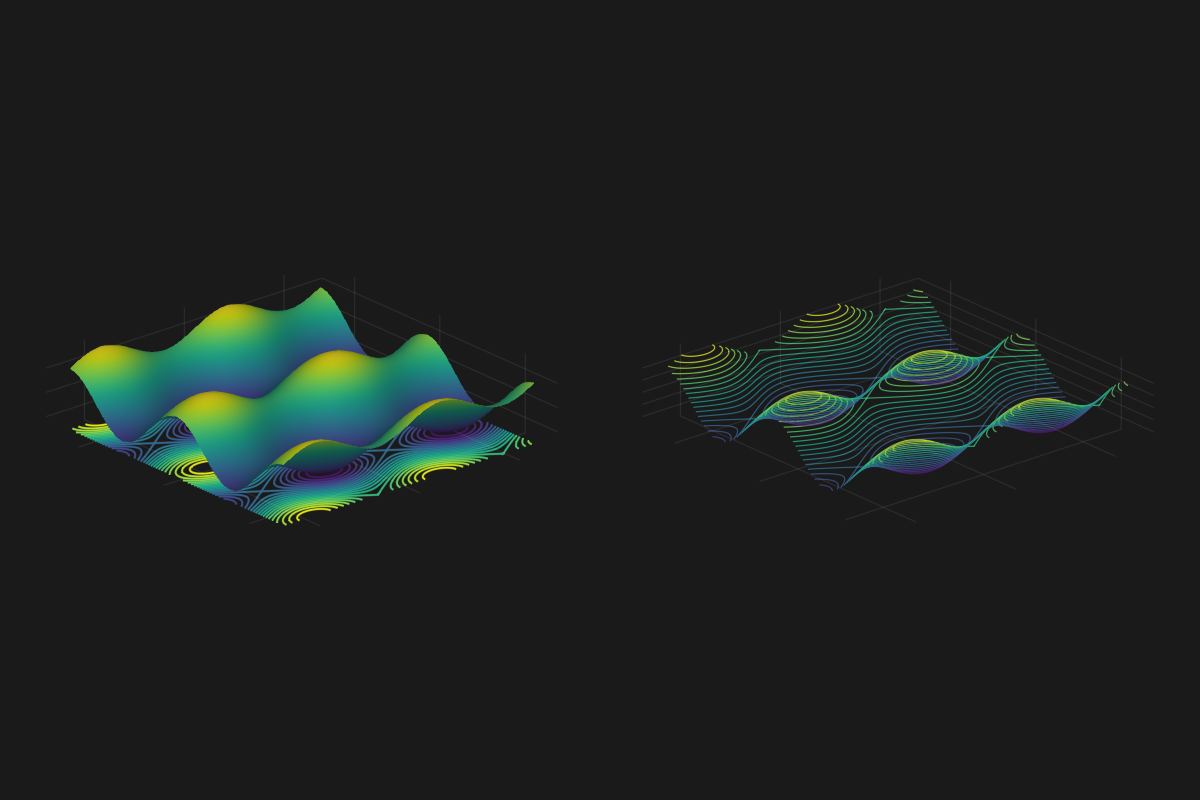

GLMakie.Screen(...)

In [3]:
# let's define a function
f(x,y) = 0.5*sin(x) + cos(y)
x = LinRange(-2π, 2π, 1000)
y = LinRange(-2π, 2π, 1000)
z = [f(x[i], y[j]) for i in eachindex(x), j in eachindex(y)]

# and plot it
contourplot(x, y, z)

The surfaceplot on the left shows the function $f(x,y) = 0.5*sin(x) + cos(y)$ in a 3-D plot with a contourplot in the x,y-plane. On the right is a 3-D contourplot. Each color in the contourplot on the right represents a different value of $z= f(x,y) = 0.5*sin(x) + cos(y)$. So we can interpret it as as a visulaization of where the function $f(x,y) = 0.5*sin(x) + cos(y)$ is equal to a specific value like $f(x,y) = 0.5$. 

If we add another constraint like:

$$
  f_2(x,y) = c_2,
$$

we have two constraints. We get two 1-D curves in a 2-D space. The intersection of these two curves is the solution to the equation (a 0-D result). This point is the solution to the equation system. In general: Each independant equation reduces the dimension of the solution space by one. 

For example, if we solve the equation system:

$$
  f_1(x,y) = 0.5*sin(x) + cos(y) = c_1 = 0,
$$

$$
  f_2(x,y) = x = c_2 = 0,
$$

we get the point (or points - since we can also have multiple solutions), where the two curves of each solution intersect. Here we get all points where $x=0$ and $0.5*sin(0) + cos(y) = 0$. One solution therefore ist $x=0, y=\frac{\pi}{2}, z=0$. 

We can rewrite this system of equations into a vector form and make it more general: 

## The Root Finding Problem

We want to find a vector $\mathbf{x} = (x_1, \dots, x_n)$, given on a continuous vector-valued function $\mathbf{f}= (f_1, \dots f_n)$ mapping from $\mathbb{R}^n$ into $\mathbb{R}^n$, such that

$$
\begin{split}\begin{split}
  f_1(x_1,\dots,x_n) &= 0,\\
  f_2(x_1,\dots,x_n) &= 0,\\
  &\vdots\\
  f_n(x_1,\dots,x_n) &= 0.
\end{split}\end{split}
$$

We can also write this in a more compact form:

$$
  \mathbf{f}(\mathbf{x}) = \mathbf{0}.
$$

The solution $\mathbf{x}$ is called the **root** of the vector-valued function. How can we find the root of a function with multiple variables? 